In [1]:
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
categories = ['PNEUMONIA', 'NORMAL'] # Index 0-Pulmão Pneumonico e 1-Pulmão Normal
img_size = 150 # Redimensionando a imagem para 150x150 pixels

def images_manipulation(data_dir):
    data = [] 
    number_of_normal = 0
    number_of_pneumonia = 0

    for category in categories: 
        path = os.path.join(data_dir, category)
        lista = os.listdir(path)

        if category == "NORMAL":
          number_of_normal += len(lista)
        else:
          number_of_pneumonia += len(lista)

        class_num = categories.index(category)
        for img in os.listdir(path):
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_image = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_image, class_num])
                
    return np.array(data), number_of_normal, number_of_pneumonia

test_data, number_of_normal_test, number_of_pneumonia_test = images_manipulation('content/chest_xray/test')
train_data, number_of_normal_train, number_of_pneumonia_train = images_manipulation('content/chest_xray/train')

C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


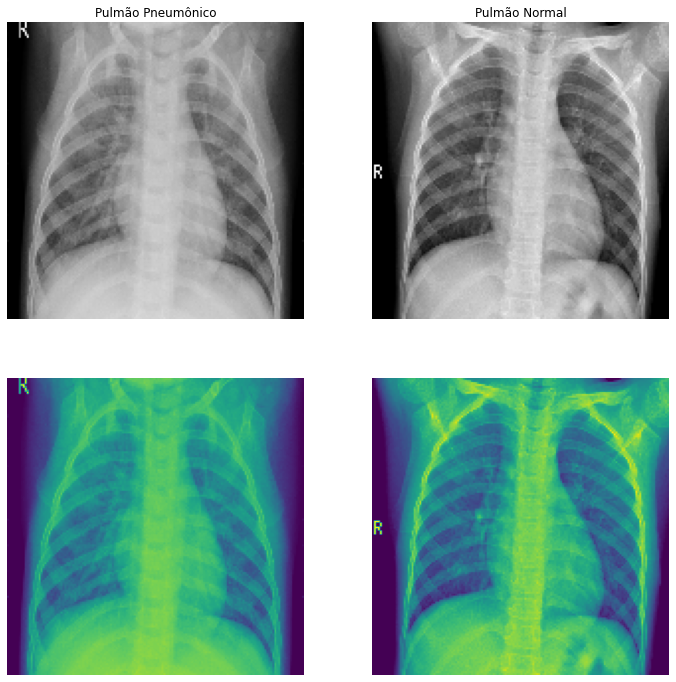

Classificação -> 0 = Pneumonia
Classificação -> 1 = Normal


In [15]:
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.imshow(test_data[200][0], cmap='gray')
plt.title("Pulmão Pneumônico")
plt.axis('off')

plt.subplot(222)
plt.imshow(test_data[-2][0], cmap='gray')
plt.title("Pulmão Normal")
plt.axis('off')

plt.subplot(223)
plt.imshow(test_data[200][0])
plt.axis('off')

plt.subplot(224)
plt.imshow(test_data[-2][0])
plt.axis('off')

plt.show()
print(f"Classificação -> {test_data[200][1]} = Pneumonia")
print(f"Classificação -> {test_data[-2][1]} = Normal")

In [5]:
print(f"Número de Pulmões Normais no Treino: {number_of_normal_train}")
print(f"Número de Pulmões Pneumônicos no Treino: {number_of_pneumonia_train}")
print(f"Número de Pulmões Normais no Teste: {number_of_normal_test}")
print(f"Número de Pulmões Pneumônicos no Teste: {number_of_pneumonia_test}")

Número de Pulmões Normais no Treino: 1341
Número de Pulmões Pneumônicos no Treino: 3875
Número de Pulmões Normais no Teste: 234
Número de Pulmões Pneumônicos no Teste: 390


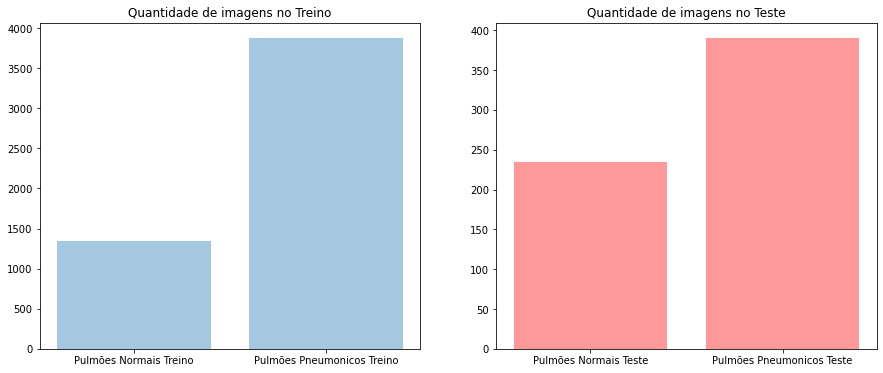

In [6]:
dicionario_barras_treino = {'Pulmões Normais Treino':number_of_normal_train,
                     'Pulmões Pneumonicos Treino':number_of_pneumonia_train}
dicionario_barras_teste = {'Pulmões Normais Teste':number_of_normal_test,
                     'Pulmões Pneumonicos Teste':number_of_pneumonia_test} 
nomes_treino = dicionario_barras_treino.keys()
valores_treino = dicionario_barras_treino.values()

nomes_test = dicionario_barras_teste.keys()
valores_test = dicionario_barras_teste.values()

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.bar(nomes_treino, valores_treino, alpha=.4) 
plt.title("Quantidade de imagens no Treino")

plt.subplot(122)
plt.bar(nomes_test, valores_test, color="r", alpha=.4) 

plt.title("Quantidade de imagens no Teste")
plt.show()

Visualizando quantidade de pixels por intensidade da cor

In [7]:
quantidade_pixel_intensidade_normal = [0]*256
quantidade_pixel_intensidade_pneumonia = [0]*256

for imagem in test_data:
    if imagem[1] == 0: 
        for linha in imagem[0]:
            for pixel in linha:
                quantidade_pixel_intensidade_pneumonia[pixel] += 1
    else:
        for linha in imagem[0]:
            for pixel in linha:
                quantidade_pixel_intensidade_normal[pixel] += 1

print("Teste Pronto")

for imagem in train_data:
    if imagem[1] == 0: 
        for linha in imagem[0]:
            for pixel in linha:
                quantidade_pixel_intensidade_pneumonia[pixel] += 1
    else:
        for linha in imagem[0]:
            for pixel in linha:
                quantidade_pixel_intensidade_normal[pixel] += 1

print("Treino Pronto")

Teste Pronto
Treino Pronto


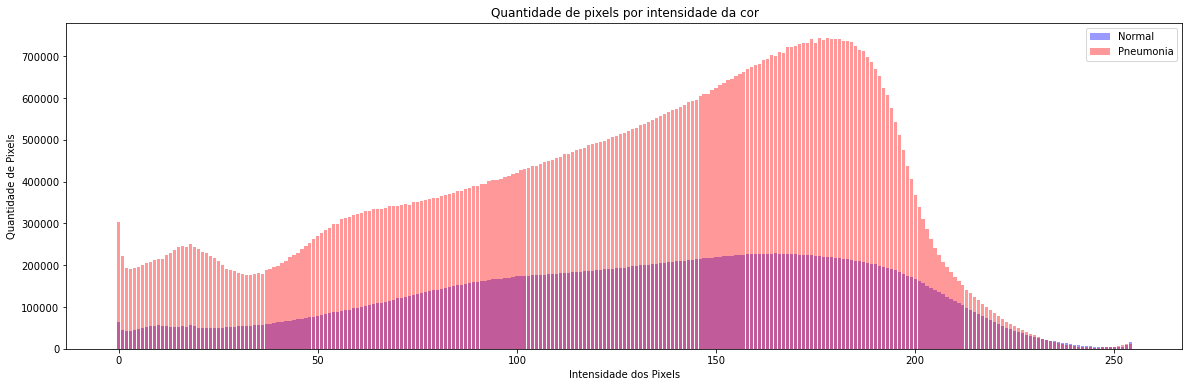

In [8]:
# Tiramos o elemento 0 da lista, pois ele representa a cor 0 em RGB (preto absoluto),
# que aparece diversas vezes nos cantos dos raios X, partes da imagem que por representarem
# o fundo, e não o pulmão em si, são irrelevantes para a análise.


plt.figure(figsize=(20,6))
plt.bar(range(255), quantidade_pixel_intensidade_normal[1:], color="b", alpha=.4, label="Normal")
plt.bar(range(255), quantidade_pixel_intensidade_pneumonia[1:], color="r", alpha=.4, label="Pneumonia")
plt.title("Quantidade de pixels por intensidade da cor")
plt.xlabel("Intensidade dos Pixels")
plt.ylabel("Quantidade de Pixels")
plt.legend()
plt.show()

Visualizando um "Pulmão-médio" de cada classificação

In [13]:
dados = pd.DataFrame(np.append(test_data, train_data, axis=0))

dados = dados.rename( columns = {0:'imagem', 1:'classificacao'})
dados.classificacao = dados.classificacao.astype("category")
dados.classificacao.cat.categories = (["pneumonia", "normal"])


pneumonia = dados.loc[dados["classificacao"] == "pneumonia", "imagem"]
normal = dados.loc[dados["classificacao"] == "normal", "imagem"]

pneumonia_media = np.array(pneumonia.tolist())
normal_media = np.array(normal.tolist())

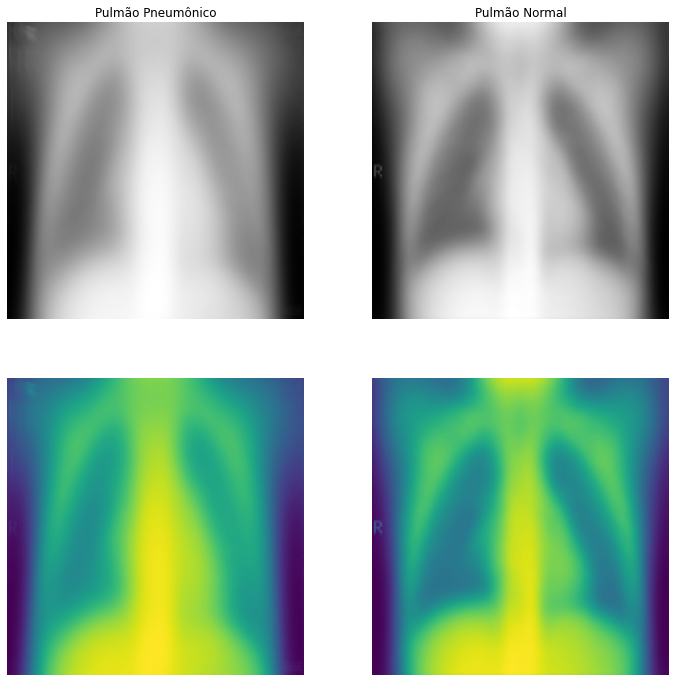

In [11]:
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.imshow(pneumonia_media.mean(axis=0), cmap="gray")
plt.title("Pulmão Pneumônico")
plt.axis('off')

plt.subplot(222)
plt.imshow(normal_media.mean(axis=0), cmap="gray")
plt.title("Pulmão Normal")
plt.axis('off')

plt.subplot(223)
plt.imshow(pneumonia_media.mean(axis=0))
plt.axis('off')

plt.subplot(224)
plt.imshow(normal_media.mean(axis=0))
plt.axis('off')

plt.show()